In [2]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import pearsonr

In [3]:
#Pull up Residential Energy Consumption throughout 50 states (including USA totals) dataframe from CSV file
df = pd.read_csv (r'Residential_Energy_Consumption.csv')
print (df)

     State      2015      2014      2013      2012      2011      2010  \
0   USA-AL    349230    378853    358238    338290    377607    419277   
1   USA-AK     53136     47823     48810     54597     53939     52253   
2   USA-AZ    385477    377963    389450    378865    391384    376625   
3   USA-AR    228573    246790    241000    222034    247420    253858   
4   USA-CA   1347807   1355062   1440463   1437024   1500559   1466657   
5   USA-CO    347377    353334    363327    335025    354262    352304   
6   USA-CT    251763    248119    245613    232769    238420    251419   
7   USA-DE     65665     66613     64890     62032     67909     72461   
8   USA-FL   1207549   1177125   1147013   1128534   1191486   1271713   
9   USA-GA    697029    741983    686812    671729    747018    819871   
10  USA-HI     31575     31411     30848     31530     32506     32681   
11  USA-ID    122911    119891    127028    116608    125277    120873   
12  USA-IL    924266   1031197   10100

In [4]:
#Calculate total residential energy consumption from 2000-2015 per state and add a column to showcase totals
state_total = df.sum(axis=1)
state_total

df["Total Consumption"] = state_total
df

,State,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,Total Consumption
0,USA-AL,349230,378853,358238,338290,377607,419277,372781,388024,394481,386066,384310,372753,367777,379696,360336,380174,6007893
1,USA-AK,53136,47823,48810,54597,53939,52253,53536,53668,53742,59556,53524,55874,52810,52028,54045,50780,850121
2,USA-AZ,385477,377963,389450,378865,391384,376625,373842,385383,394012,383046,367317,356054,345614,333695,340074,332073,5910874
3,USA-AR,228573,246790,241000,222034,247420,253858,226791,236545,232476,224542,232994,214193,217225,224615,220830,224902,3694788
4,USA-CA,1347807,1355062,1440463,1437024,1500559,1466657,1483981,1511586,1474374,1488574,1449101,1489320,1455716,1425659,1417985,1426721,23170589
5,USA-CO,347377,353334,363327,335025,354262,352304,339585,347873,343360,327996,329965,313885,324134,323517,307532,298492,5361968
6,USA-CT,251763,248119,245613,232769,238420,251419,253184,255114,265629,256700,286930,298534,298395,261825,263260,271535,4179209
7,USA-DE,65665,66613,64890,62032,67909,72461,68693,68574,67885,63315,70499,67820,69380,67959,61557,63432,1068684
8,USA-FL,1207549,1177125,1147013,1128534,1191486,1271713,1223002,1216701,1254926,1265230,1263599,1249670,1257345,1235554,1165291,1162604,19417342
9,USA-GA,697029,741983,686812,671729,747018,819871,726627,737925,735842,711957,713846,716909,680502,659384,623747,657077,11328258


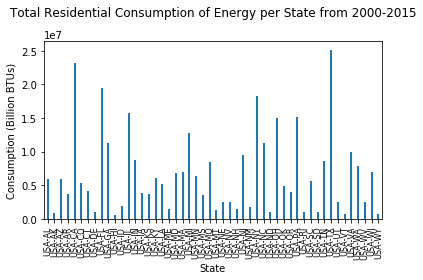

In [56]:
#Create a bar plot to visualize total state consumption throughout the pre-selected time period
#Remove row with USA totals
df1 = df.drop(df.index[50])
df1

totals = df1["Total Consumption"]
states = df1["State"]
ttl = "Total Residential Consumption of Energy per State from 2000-2015"

x = states.values
y = totals.values
x_position = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,
              41,42,43,44,45,46,47,48,49,50]

plt.bar(x, y, width=0.3, align="center")
plt.title(ttl, pad=25)
plt.xlabel("State")
plt.ylabel("Consumption (Billion BTUs)")
plt.xticks(x, rotation='vertical')
plt.tick_params(axis='x', labelsize=8)
plt.xlim(-0.5, (len(x) - 0.5))
plt.tight_layout()
plt.show()

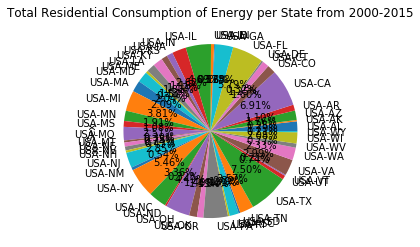

<Figure size 432x288 with 0 Axes>

In [33]:
#Create a pie plot to better visualize total state consumption the pre-selected time period
# Labels for the sections of our pie chart
labels = states

# The values of each section of the pie chart
values = totals

plt.pie(values, labels=labels, autopct="%2.2f%%", shadow=False, startangle=360)

plt.title("Total Residential Consumption of Energy per State from 2000-2015")
plt.ylabel("Sex")
plt.show()
plt.tight_layout()